# Exploraty Data Analysis for E-mail Spam Collection

### Importing the necessary libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Load and Read the dataset

In [12]:
file_path = "C:\\Users\\ramana777\\Downloads\\spam.csv"
data = pd.read_csv(file_path,encoding='latin-1')
data = data.iloc[:, :2]  # Keep only the first two columns
data.columns = ['label', 'message']  # Rename columns to 'label' and 'message'

### Basic Data exploration

In [13]:
print("DataSet:")
data

DataSet:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
print("First Ten Rows:")
data.head(10)

First Ten Rows:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [15]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Duplicate Data Analysis

In [16]:
print("Duplicated Rows:")
data.duplicated().sum()

Duplicated Rows:


403

In [17]:
data = data.drop_duplicates()

In [18]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Missing Value Analysis

In [19]:
print("Missing Values:")
data.isnull().sum()

Missing Values:


label      0
message    0
dtype: int64

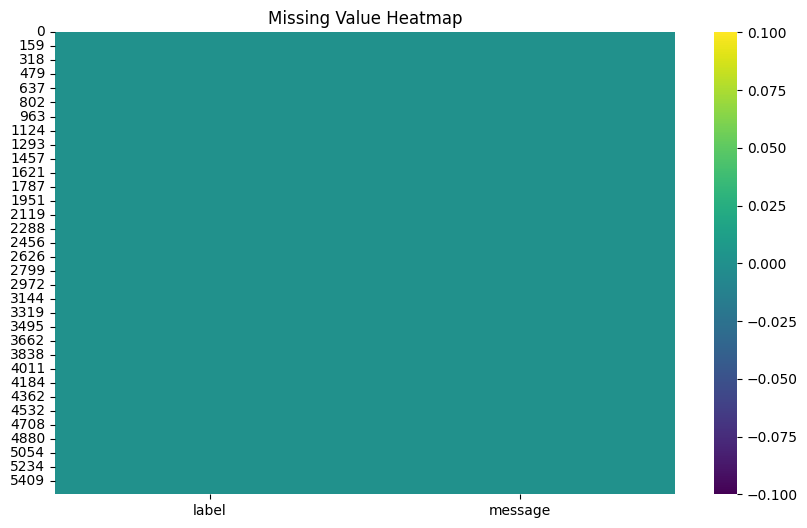

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cmap='viridis',cbar=True)
plt.title("Missing Value Heatmap")
plt.show()

In [21]:
print("Dataset statistics:")
data.describe()

Dataset statistics:


,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


### Label Distribution

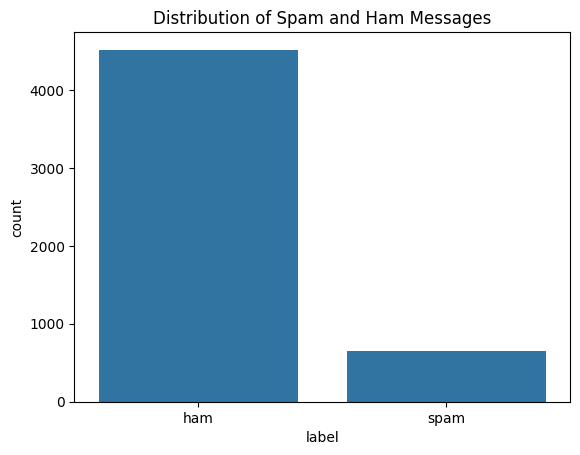

In [22]:
sns.countplot(data=data,x='label')
plt.title("Distribution of Spam and Ham Messages")
plt.show()

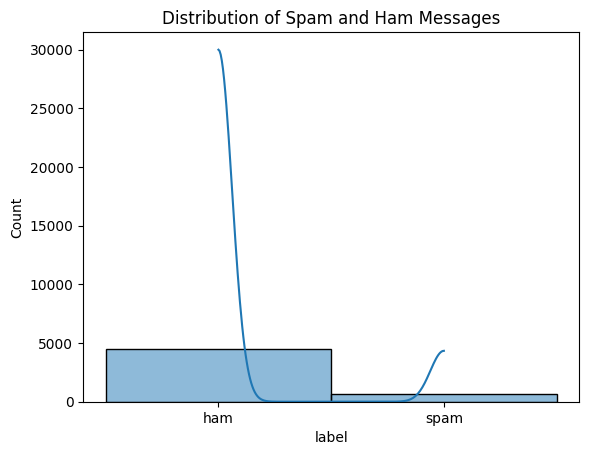

In [23]:
sns.histplot(data['label'],kde=True,bins=10)
plt.title("Distribution of Spam and Ham Messages")
plt.show()

### Adding Basic Text Statistics

In [24]:
data['char_count'] = data['message'].apply(len)
data['word_count'] = data['message'].apply(lambda x:len(x.split()))
data['sentence_count'] = data['message'].apply(lambda x:len(x.split('.')))

C:\Users\ramana777\AppData\Local\Temp\ipykernel_4436\263891510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['char_count'] = data['message'].apply(len)
C:\Users\ramana777\AppData\Local\Temp\ipykernel_4436\263891510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word_count'] = data['message'].apply(lambda x:len(x.split()))
C:\Users\ramana777\AppData\Local\Temp\ipykernel_4436\263891510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [25]:
print("Statistical Summary:")
data[['char_count','word_count','sentence_count']].describe()

Statistical Summary:


,char_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.934030
std,58.236293,11.068488,2.541852
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,4.000000
max,910.000000,171.000000,42.000000


### Visualizing Basic Text Features

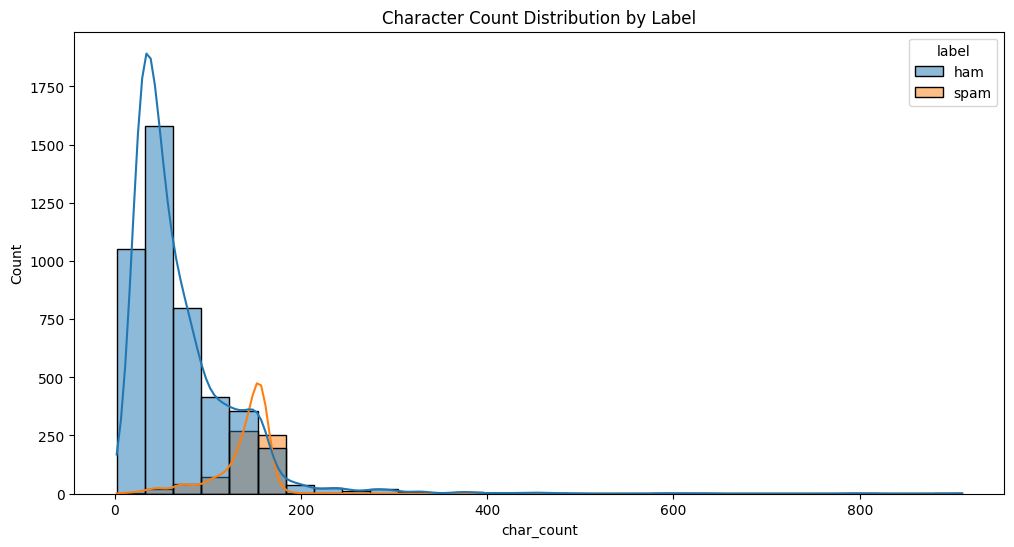

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='char_count',hue='label',kde=True,bins=30)
plt.title("Character Count Distribution by Label")
plt.show()

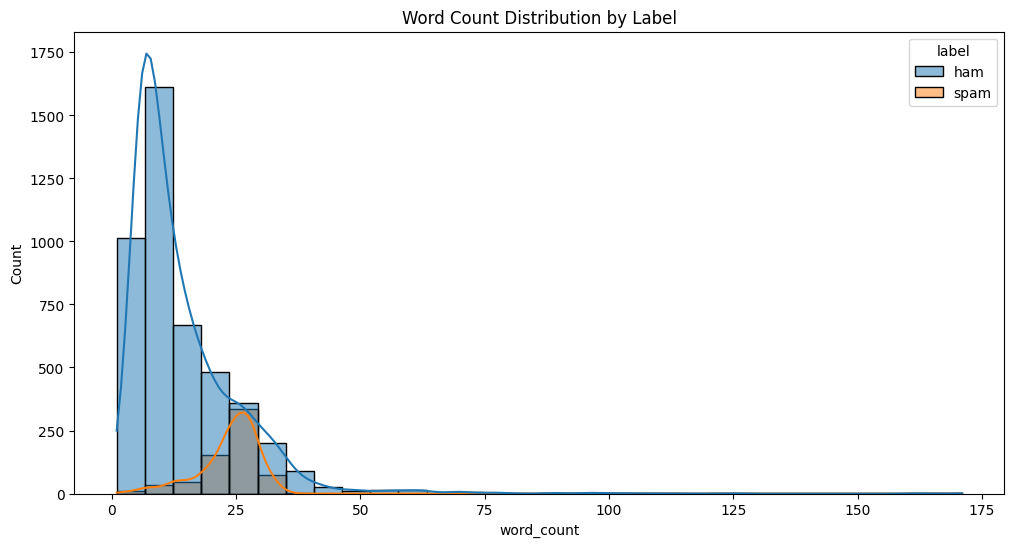

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='word_count',hue='label',kde=True,bins=30)
plt.title("Word Count Distribution by Label")
plt.show()

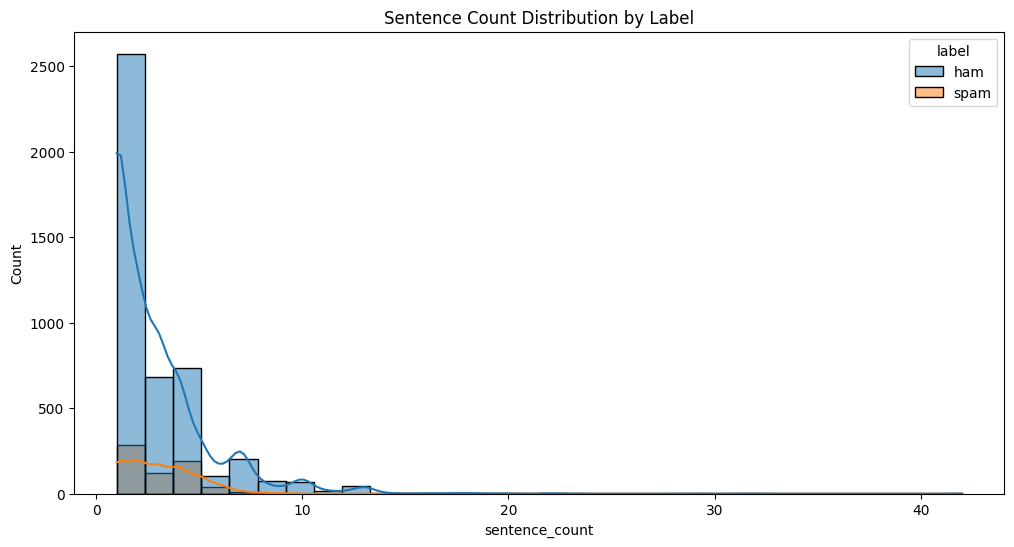

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='sentence_count',hue='label',kde=True,bins=30)
plt.title("Sentence Count Distribution by Label")
plt.show()

##### Top words in spam and ham messages

In [29]:
spam_messages = data[data['label']=='spam']['message']
ham_messages = data[data['label']=='ham']['message']

### Generating Word Clouds

In [30]:
spam_words = ''.join(spam_messages)
ham_words = ''.join(ham_messages)

In [31]:
spam_wordcloud = WordCloud(width=800,height=400,background_color='red').generate(spam_words)
ham_wordcloud = WordCloud(width=800,height=400,background_color='green').generate(ham_words)

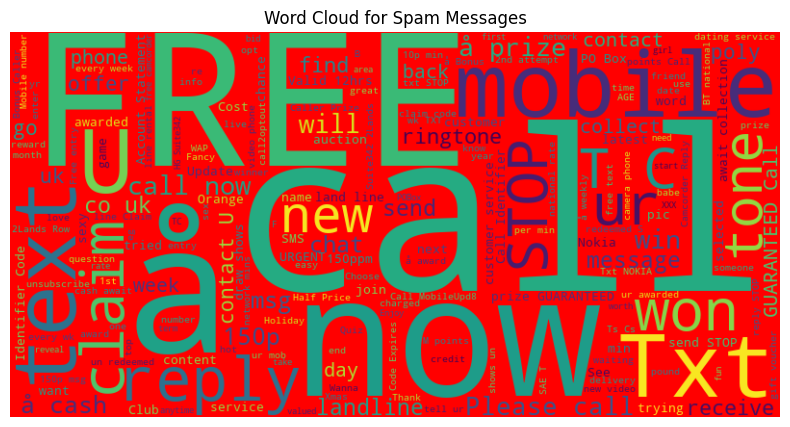

In [32]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wordcloud,interpolation='bilinear')
plt.title("Word Cloud for Spam Messages")
plt.axis("off")
plt.show()

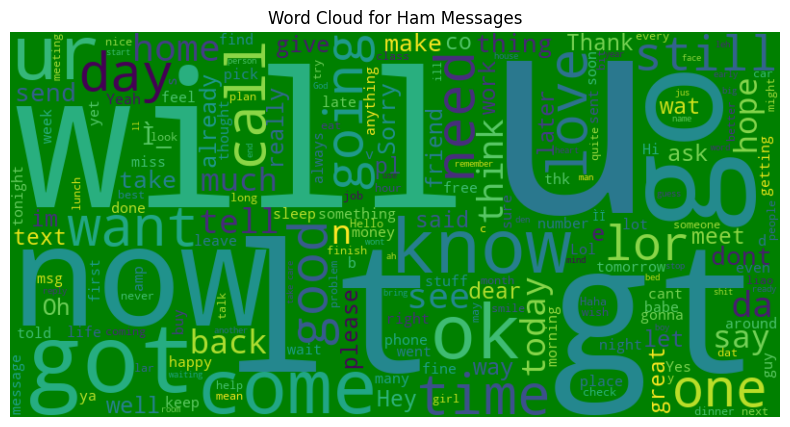

In [33]:
plt.figure(figsize=(10,5))
plt.imshow(ham_wordcloud,interpolation='bilinear')
plt.title("Word Cloud for Ham Messages")
plt.axis("off")
plt.show()

### Most Common Words

In [34]:
spam_word_freq = Counter(''.join(spam_messages).split())
ham_word_freq = Counter(''.join(ham_messages).split())

In [35]:
spam_common = spam_word_freq.most_common(10)
ham_common = ham_word_freq.most_common(10)

In [36]:
print("Most Common Word in Spam Messages:")
spam_common

Most Common Word in Spam Messages:


[('to', 522),
 ('a', 314),
 ('your', 170),
 ('call', 159),
 ('the', 159),
 ('or', 155),
 ('for', 152),
 ('2', 150),
 ('you', 146),
 ('is', 130)]

In [37]:
print("Most Common Word in Ham Messages:")
ham_common

Most Common Word in Ham Messages:


[('to', 1447),
 ('you', 1388),
 ('I', 1008),
 ('the', 954),
 ('a', 884),
 ('and', 712),
 ('i', 704),
 ('in', 673),
 ('u', 570),
 ('my', 569)]

### Visualization of most common words

In [38]:
spam_common_df = pd.DataFrame(spam_common,columns=['Word','Frequency'])
ham_common_df = pd.DataFrame(ham_common,columns=['Word','Frequency'])

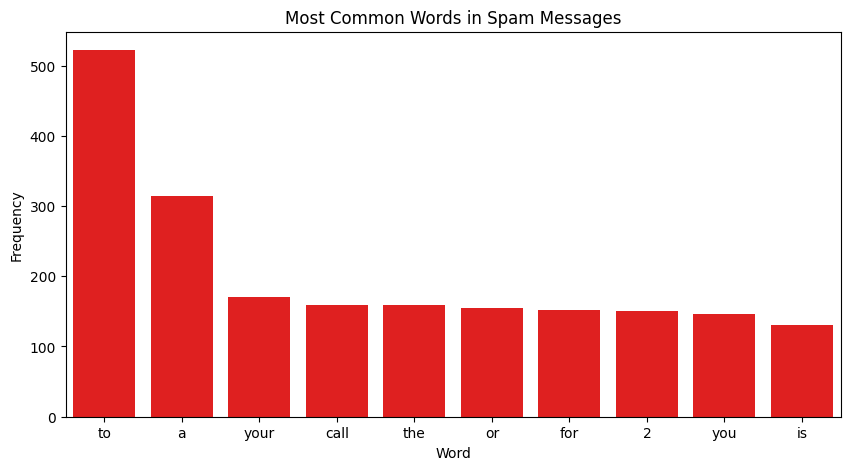

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=spam_common_df,x='Word',y='Frequency',color='red')
plt.title("Most Common Words in Spam Messages")
plt.show()

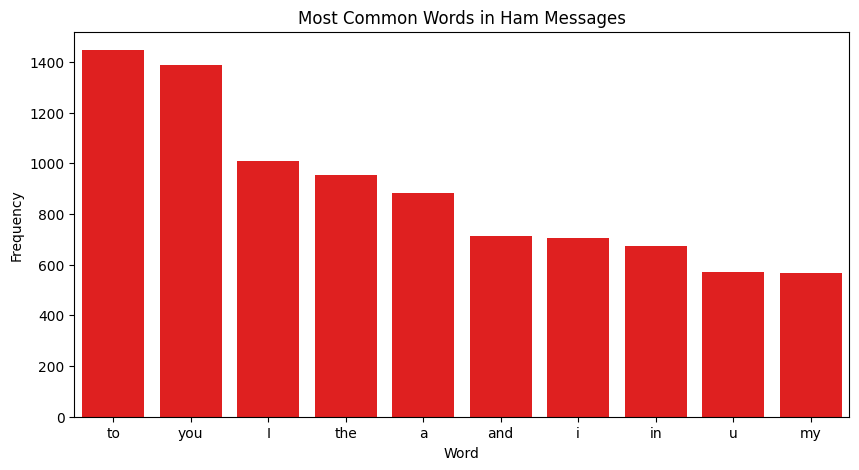

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(data=ham_common_df,x='Word',y='Frequency',color='red')
plt.title("Most Common Words in Ham Messages")
plt.show()

##### Correlation between character and word count

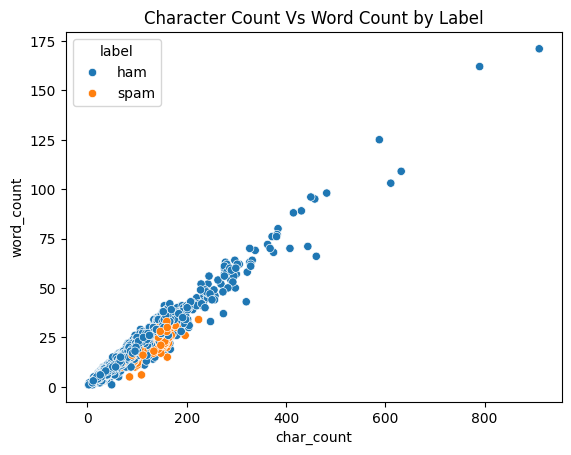

In [41]:
sns.scatterplot(data=data,x='char_count',y='word_count',hue='label')
plt.title("Character Count Vs Word Count by Label")
plt.show()

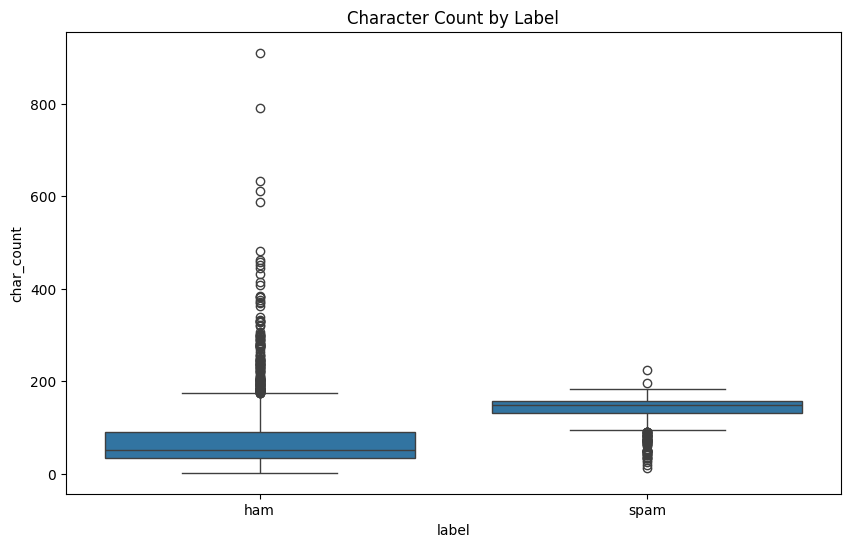

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='label',y='char_count')
plt.title("Character Count by Label")
plt.show()

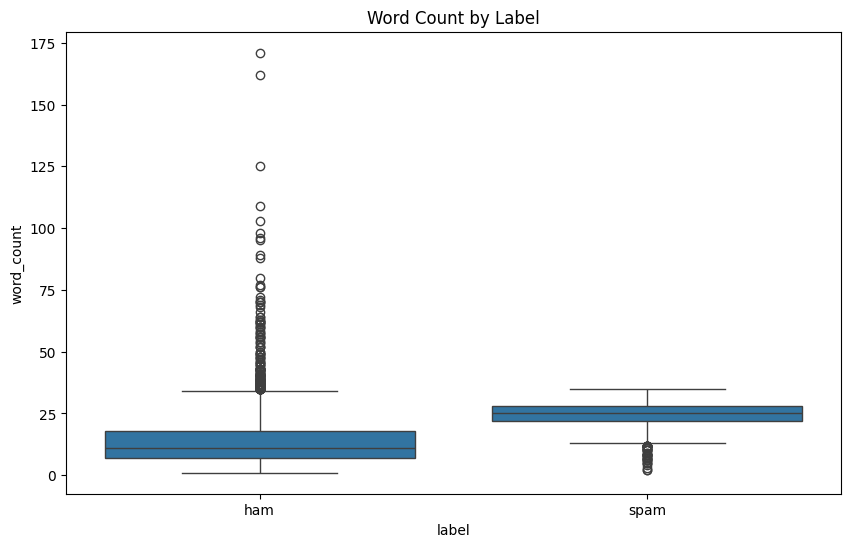

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='label',y='word_count')
plt.title("Word Count by Label")
plt.show()

### Length Analysis

In [44]:
longest_message = data.loc[data['char_count'].idxmax()]
shortest_message = data.loc[data['char_count'].idxmin()]
print("\nLongest Message:\n",longest_message)
print("\nShortest Message:\n",shortest_message)


Longest Message:
 label                                                           ham
message           For me the love should start with attraction.i...
char_count                                                      910
word_count                                                      171
sentence_count                                                   22
Name: 1084, dtype: object

Shortest Message:
 label             ham
message            Ok
char_count          2
word_count          1
sentence_count      1
Name: 1924, dtype: object


In [45]:
specific_words = ['free','win','urgent']
for word in specific_words:
    data[word] = data['message'].str.contains(word,case=False,na=False).astype(int)
    print(f"\nMessages containing '{word}':\n",data[data[word]==1].shape[0])


Messages containing 'free':
 231

Messages containing 'win':
 141

Messages containing 'urgent':
 62


C:\Users\ramana777\AppData\Local\Temp\ipykernel_4436\2237372734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[word] = data['message'].str.contains(word,case=False,na=False).astype(int)
C:\Users\ramana777\AppData\Local\Temp\ipykernel_4436\2237372734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[word] = data['message'].str.contains(word,case=False,na=False).astype(int)
C:\Users\ramana777\AppData\Local\Temp\ipykernel_4436\2237372734.py:3: SettingWithCopyWarning: 
A value is trying to be s

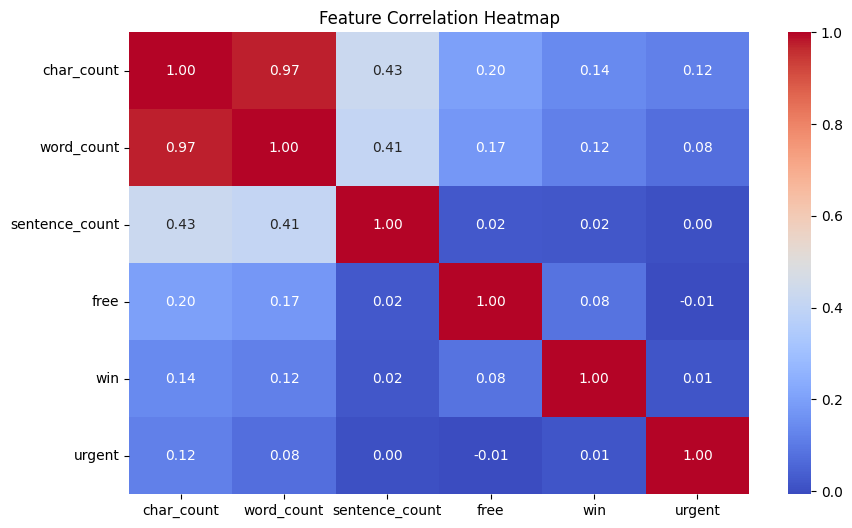

In [46]:
correlation_matrix = data[['char_count','word_count','sentence_count','free','win','urgent']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [47]:
spam_stats = data[data['label']=='spam'][['char_count','word_count']].mean()
ham_stats = data[data['label']=='ham'][['char_count','word_count']].mean()
print("\nSpam Message Statistics:\n",spam_stats)
print("\nHam Messages Statistics:\n",ham_stats)


Spam Message Statistics:
 char_count    137.891271
word_count     23.681470
dtype: float64

Ham Messages Statistics:
 char_count    70.459256
word_count    14.134632
dtype: float64


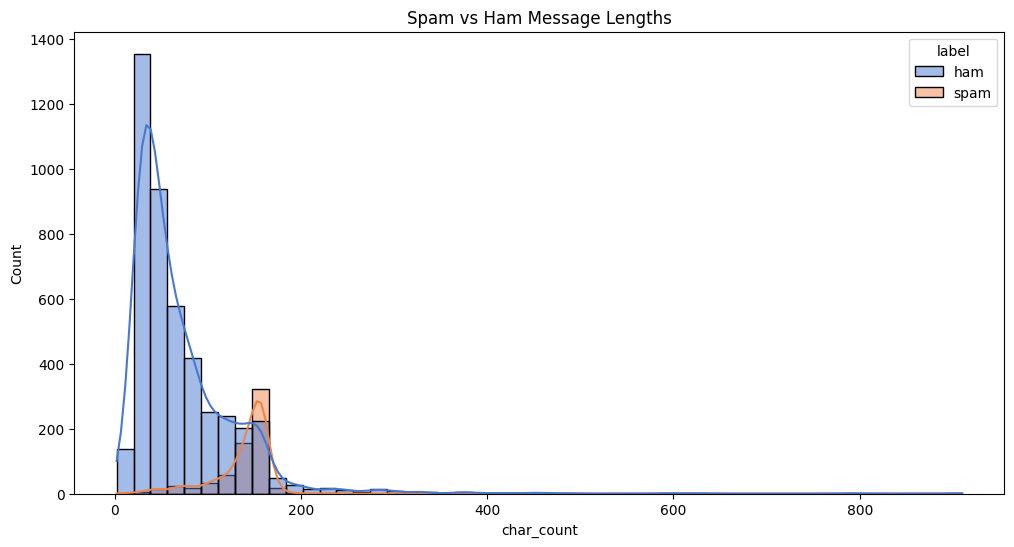

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(data=data,x='char_count',hue='label',kde=True,bins=50,palette='muted')
plt.title("Spam vs Ham Message Lengths")
plt.show()

### Preparing data for predictions

In [49]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])
y = data['label']

### Split and train the dataset

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Train the NaiveBayes Model

In [51]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

### Predictions

In [52]:
y_pred = model.predict(X_test)

### Evaluate the model

In [53]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print("\nAccuracy:\n",accuracy)
print("\nConfusion Matrix:\n",conf_matrix)
print("\nClassification Report:\n",class_report)


Accuracy:
 0.9791183294663574

Confusion Matrix:
 [[1093   14]
 [  13  173]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1107
        spam       0.93      0.93      0.93       186

    accuracy                           0.98      1293
   macro avg       0.96      0.96      0.96      1293
weighted avg       0.98      0.98      0.98      1293



### Confusion matrix heatmap

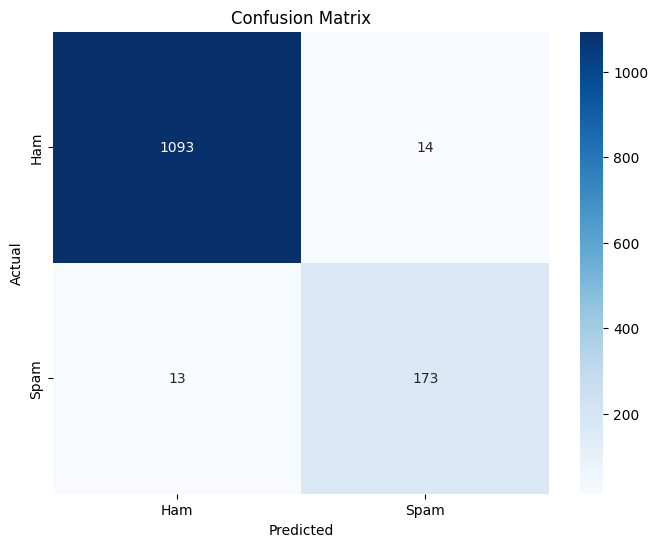

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Predicted on New messages

In [56]:
sample_messages = ["Congratulations!You've won a free ticket to Bahama","Hi,cam we meet tomorrow?"]
sample_features = vectorizer.transform(sample_messages)
sample_predictions = model.predict(sample_features)

for msg,pred in zip(sample_messages,sample_predictions):
    print(f"Message: {msg}\nPredicted: {pred}\n")

Message: Congratulations!You've won a free ticket to Bahama
Predicted: spam

Message: Hi,cam we meet tomorrow?
Predicted: ham

